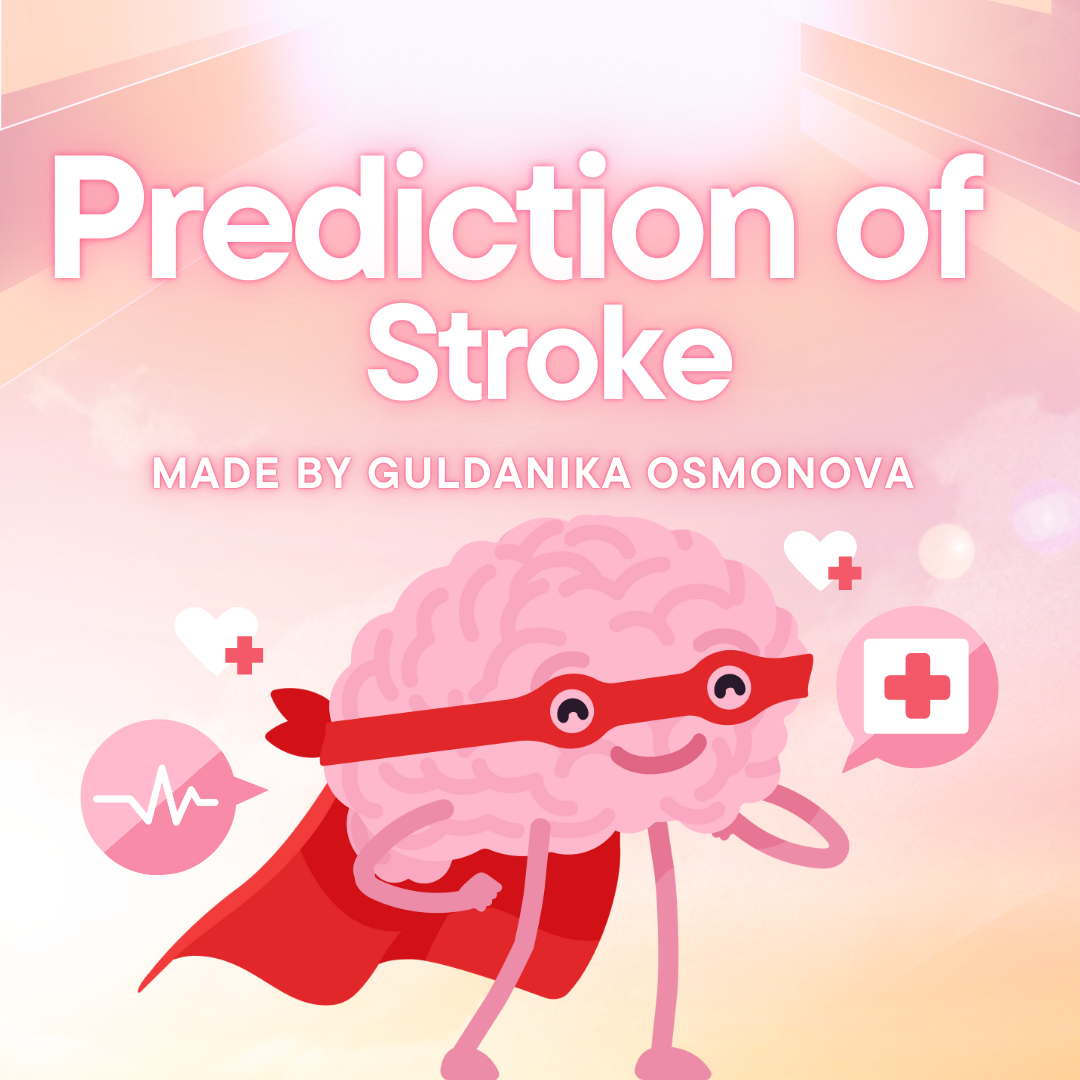

#**INTRODUCTION**

### Why Stroke Prediction is Crucial

Stroke is one of the leading causes of death and disability worldwide, affecting millions of people annually. Its consequences can be devastating, ranging from long-term physical and cognitive impairments to life-threatening complications. However, strokes are often preventable if detected early, making prediction an essential tool in modern healthcare.

By identifying individuals at high risk for stroke, medical professionals can intervene with timely preventive measures, such as lifestyle modifications, medication, or closer monitoring. Predictive models can leverage key risk factors, such as age, blood pressure, diabetes, heart conditions, and lifestyle habits, to assess an individual’s likelihood of experiencing a stroke. This enables proactive care, reducing the healthcare burden and potentially saving lives.

Moreover, in resource-limited settings, predictive tools offer a cost-effective way to prioritize care and allocate medical resources efficiently. Early prediction empowers patients and clinicians to act before a stroke occurs, emphasizing prevention over treatment and significantly improving health outcomes.

#**ABOUT THE DATASET**

Attribute Information
* 1) id: unique identifier
*2) gender: "Male", "Female" or "Other"
*3) age: age of the patient
*4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*6) ever_married: "No" or "Yes"
*7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*8) Residence_type: "Rural" or "Urban"
*9) avg_glucose_level: average glucose level in blood
*10) bmi: body mass index
*11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*12) stroke: 1 if the patient had a stroke or 0 if not

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**







#**AIM OF THIS PROJECT:**

### Purpose of the Machine Learning Project

The purpose of this machine learning project is to develop a predictive model to assess the likelihood of a stroke in individuals based on relevant patient data. According to the World Health Organization (WHO), stroke is the second leading cause of death globally, accounting for approximately 11% of total deaths. This alarming statistic highlights the critical need for effective stroke prevention strategies.

Using a dataset containing information such as gender, age, pre-existing medical conditions, and smoking status, this project aims to harness the power of machine learning to predict stroke risk. Each row in the dataset represents a patient's profile, offering detailed input parameters that the model will analyze to determine stroke likelihood.

**The ultimate goal is to create a reliable tool for early stroke prediction, enabling healthcare professionals to identify at-risk individuals and take timely preventive measures. By leveraging data-driven insights, this project aspires to contribute to reducing the global burden of stroke and improving patient outcomes.**


#This dataset was downloaded from the Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 67.4k/67.4k [00:00<00:00, 42.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#**EDA**

primary goal at this stage is to understand the dataset, uncover patterns, detect anomalies, and identify relationships between variables. Here's what we will do at EDA:

1. Understand the Dataset Structure
(e.g., number of rows and columns, data types, etc.).
Check for unique identifiers, column names, and descriptions of the features.
2. Check for Missing Values
Identify missing data in the dataset and decide how to handle them (e.g., imputation or removal).
3. Summary Statistics
Compute summary statistics for numerical features (mean, median, standard deviation, etc.).
Analyze categorical features for frequency distribution.
4. Data Visualization
Use plots to explore distributions and relationships:
Histograms and boxplots for continuous variables.
Bar plots and pie charts for categorical data.
Scatter plots or pair plots for relationships between numerical variables.
Visualize potential outliers or skewness in the data.
5. Identify Correlations
Compute the correlation matrix for numerical features to find linear relationships.
Use heatmaps to visualize correlations and detect multicollinearity.
6. Analyze Target Variable
Explore the distribution of the target variable (e.g., stroke occurrence in this case).
Check for class imbalances in classification problems.
7. Feature Relationships
Analyze how input variables relate to the target variable:
Compare distributions of features across target categories.
Look for trends or patterns using grouped visualizations.
8. Outliers and Anomalies
Identify outliers in numerical data using methods like boxplots or z-scores.
Decide whether to handle or retain them, depending on their context.
9. Assess Feature Importance
Perform initial feature selection based on domain knowledge and statistical tests.
Check for redundant or irrelevant features.
10. Form Hypotheses
Generate hypotheses about potential predictors or patterns based on EDA findings.
Use these hypotheses to guide feature engineering and model selection.

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#Stats for categorical data

#The round(..., 2) rounds the numerical parts of the output (e.g., freq) to two decimal places,
# making the results easier to read

round (df.describe(exclude = ['float', 'int64']),2)


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [10]:
# stats of numerical data
round (df.describe(exclude = 'object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


#2.Checking for the missing values

In [11]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


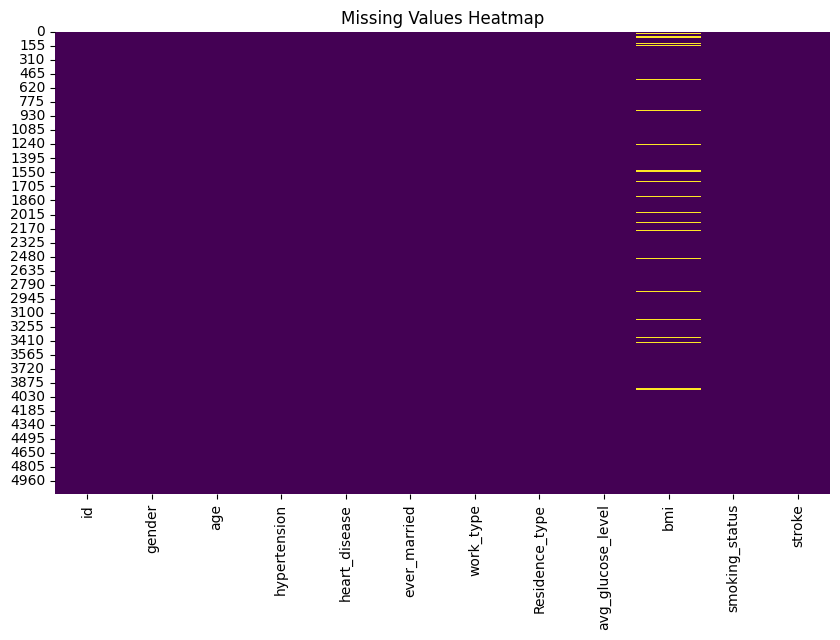

In [12]:
#Highlight where missing values exist across the dataset.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

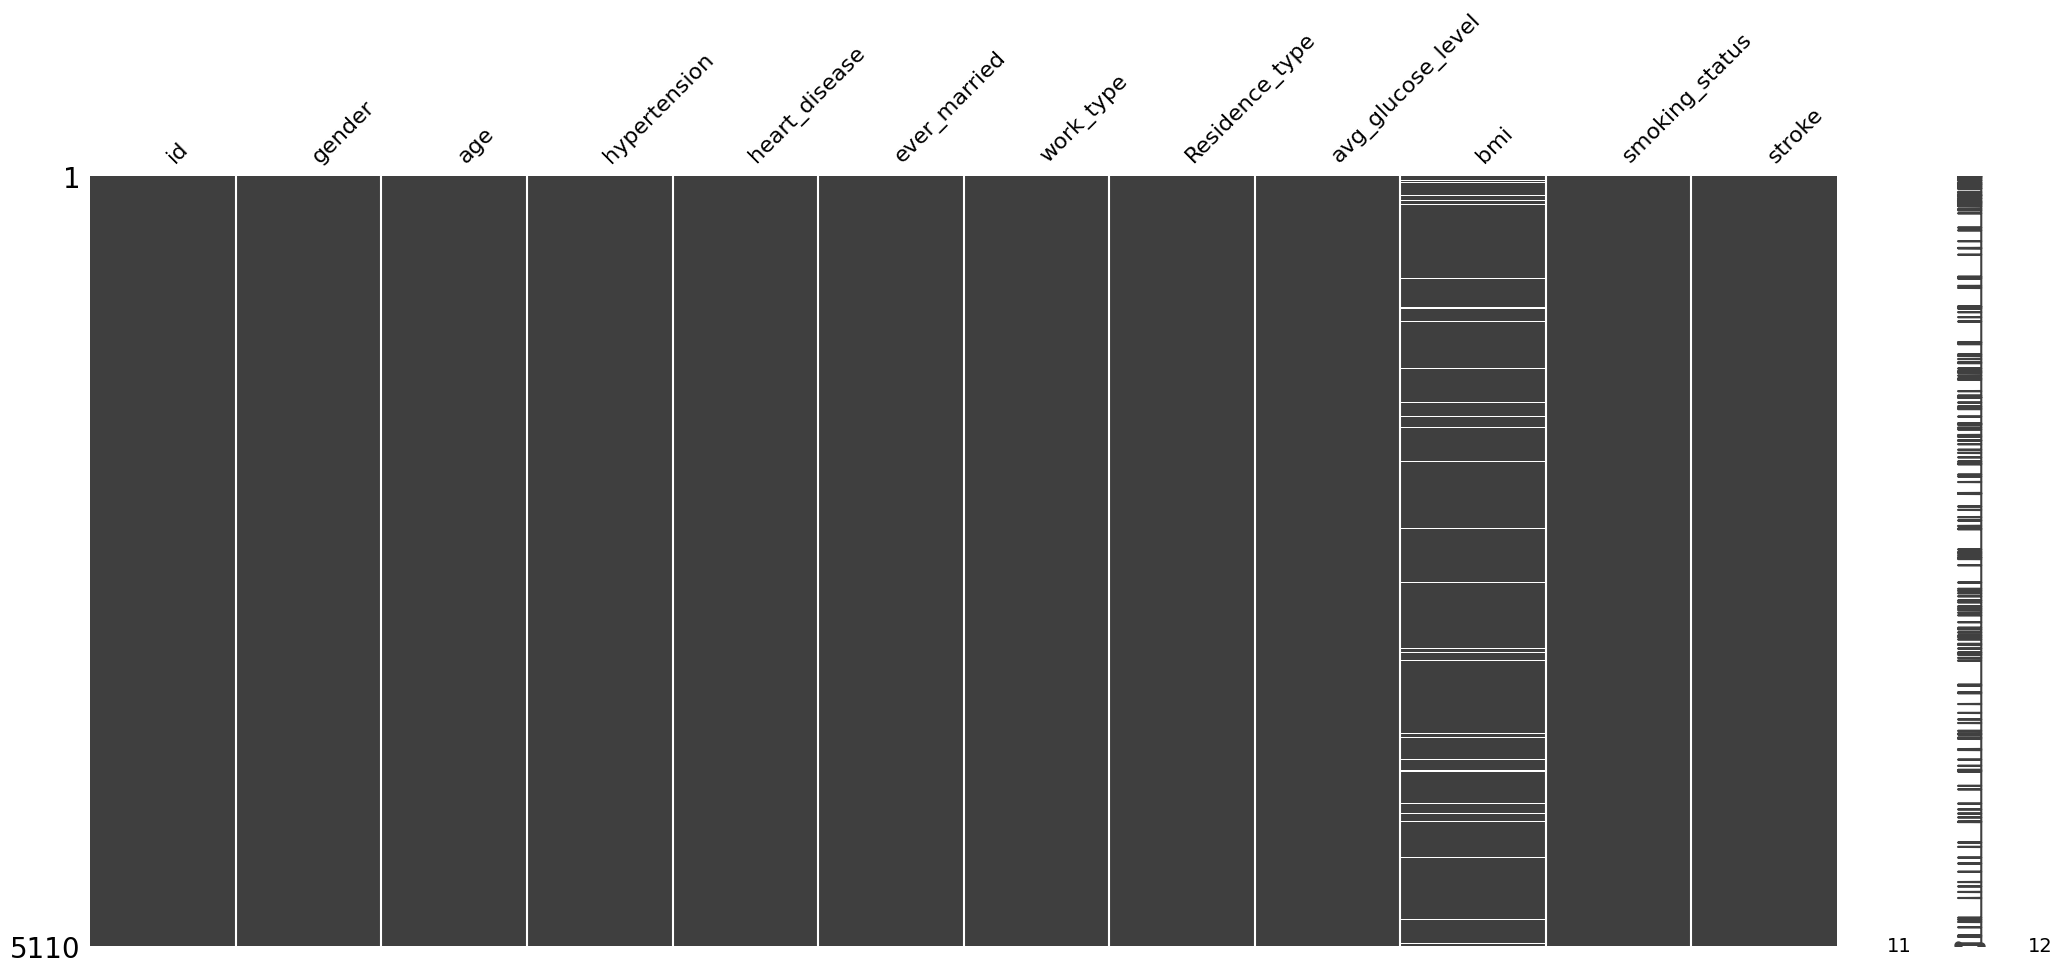

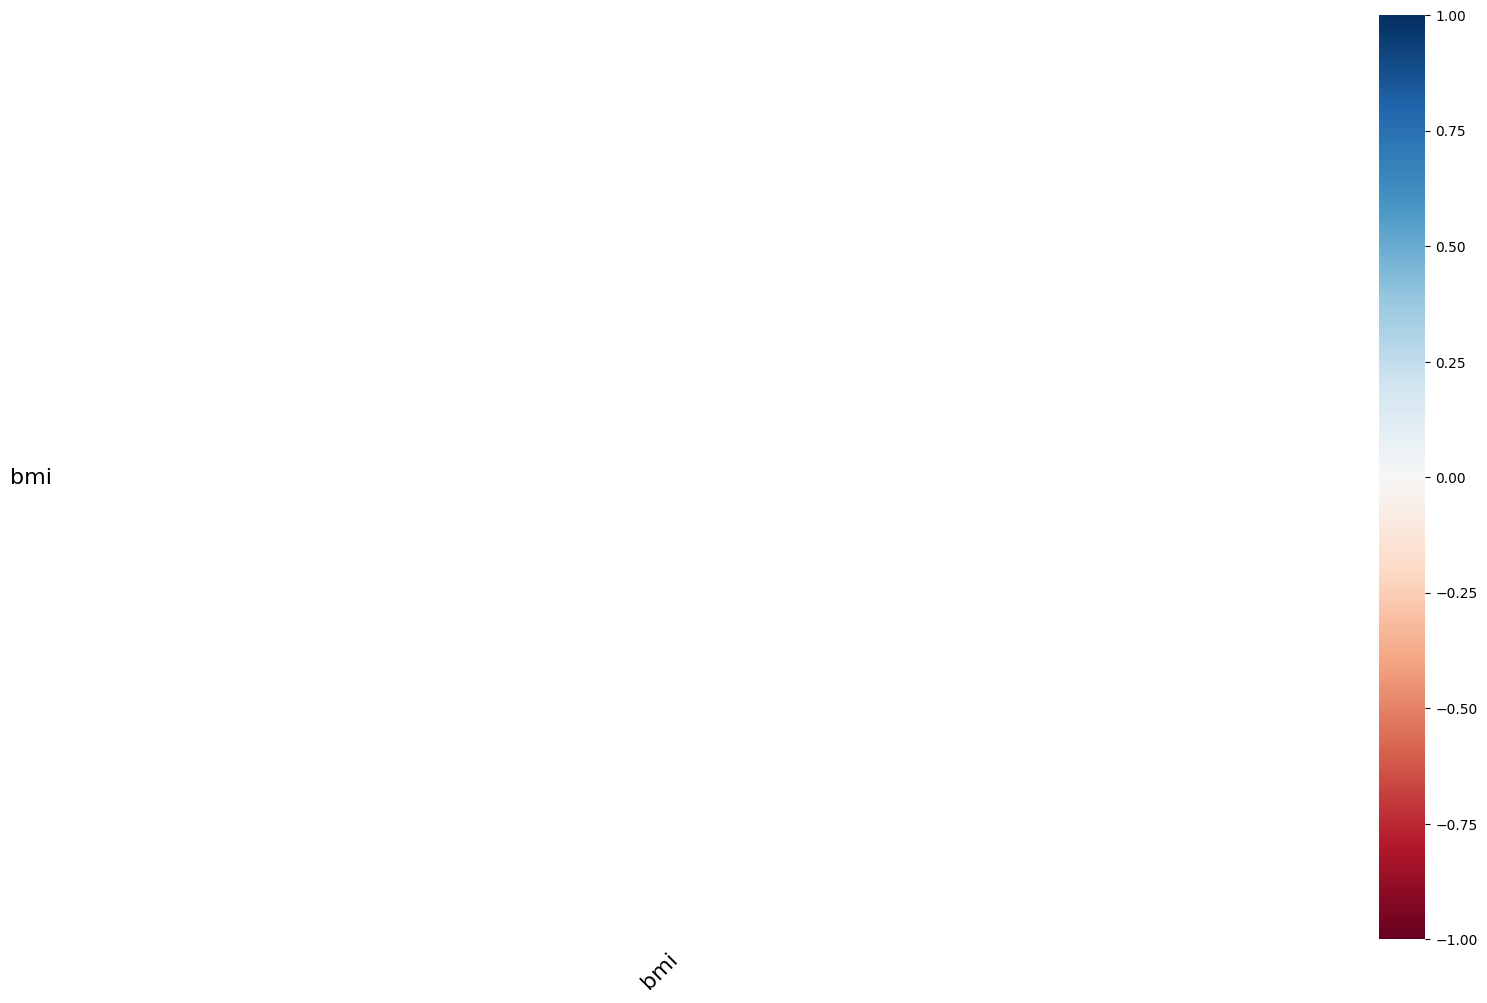

In [13]:
import missingno as msno

# Visualize missing data as a matrix
msno.matrix(df)
plt.show()

# Visualize missing data as a heatmap (correlation of missingness)
msno.heatmap(df)
plt.show()


#**HANDLING THE MISSING VALUES**

 In our case we use the Median for Imputation.
 Here are the reasons why:

* Resistant to Outliers:

 Unlike the mean, the median is
unaffected by extreme values, making it more reliable for skewed data.

* Preserves Distribution:

It maintains the central tendency of the column without introducing bias from outliers.

* Default Choice for Continuous Variables:

Median imputation is a common practice for numerical features when no other contextual information is available.


In [14]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


#BINNING OF THE CONTINUOUS NUMERICAL VARIABLES

Binning, also known as discretization, involves converting continuous numerical variables into categorical groups or "bins." This is a common preprocessing step in data analysis and machine learning, as it helps simplify complex data


I followed the standartized [BMI from WHO:
](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)




In [15]:
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 19, 25, 30, 10000], labels=['Underweight', 'Ideal', 'Overweight', 'Obesity'])


[AGE CLASSIFICATION from WHO ](https://https://www.statcan.gc.ca/en/concepts/definitions/age2




In [16]:
## binning of numerical variables

df['age_cat'] = pd.cut(df['age'], bins = [0, 14, 24, 64, 200], labels = ['Children', 'Youth', 'Adults','Seniors'])



[GLUCOSE LEVEL GRADATION ](https://https://www.medicalnewstoday.com/articles/249413#low-levels)

In [17]:
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0, 70, 99, 125, 180], labels = ['Low', 'Normal', 'High', 'Very High'])

In [18]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat', 'age_cat', 'glucose_cat'],
      dtype='object')

#**VISUALIZATION**

In [19]:
df['stroke']

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


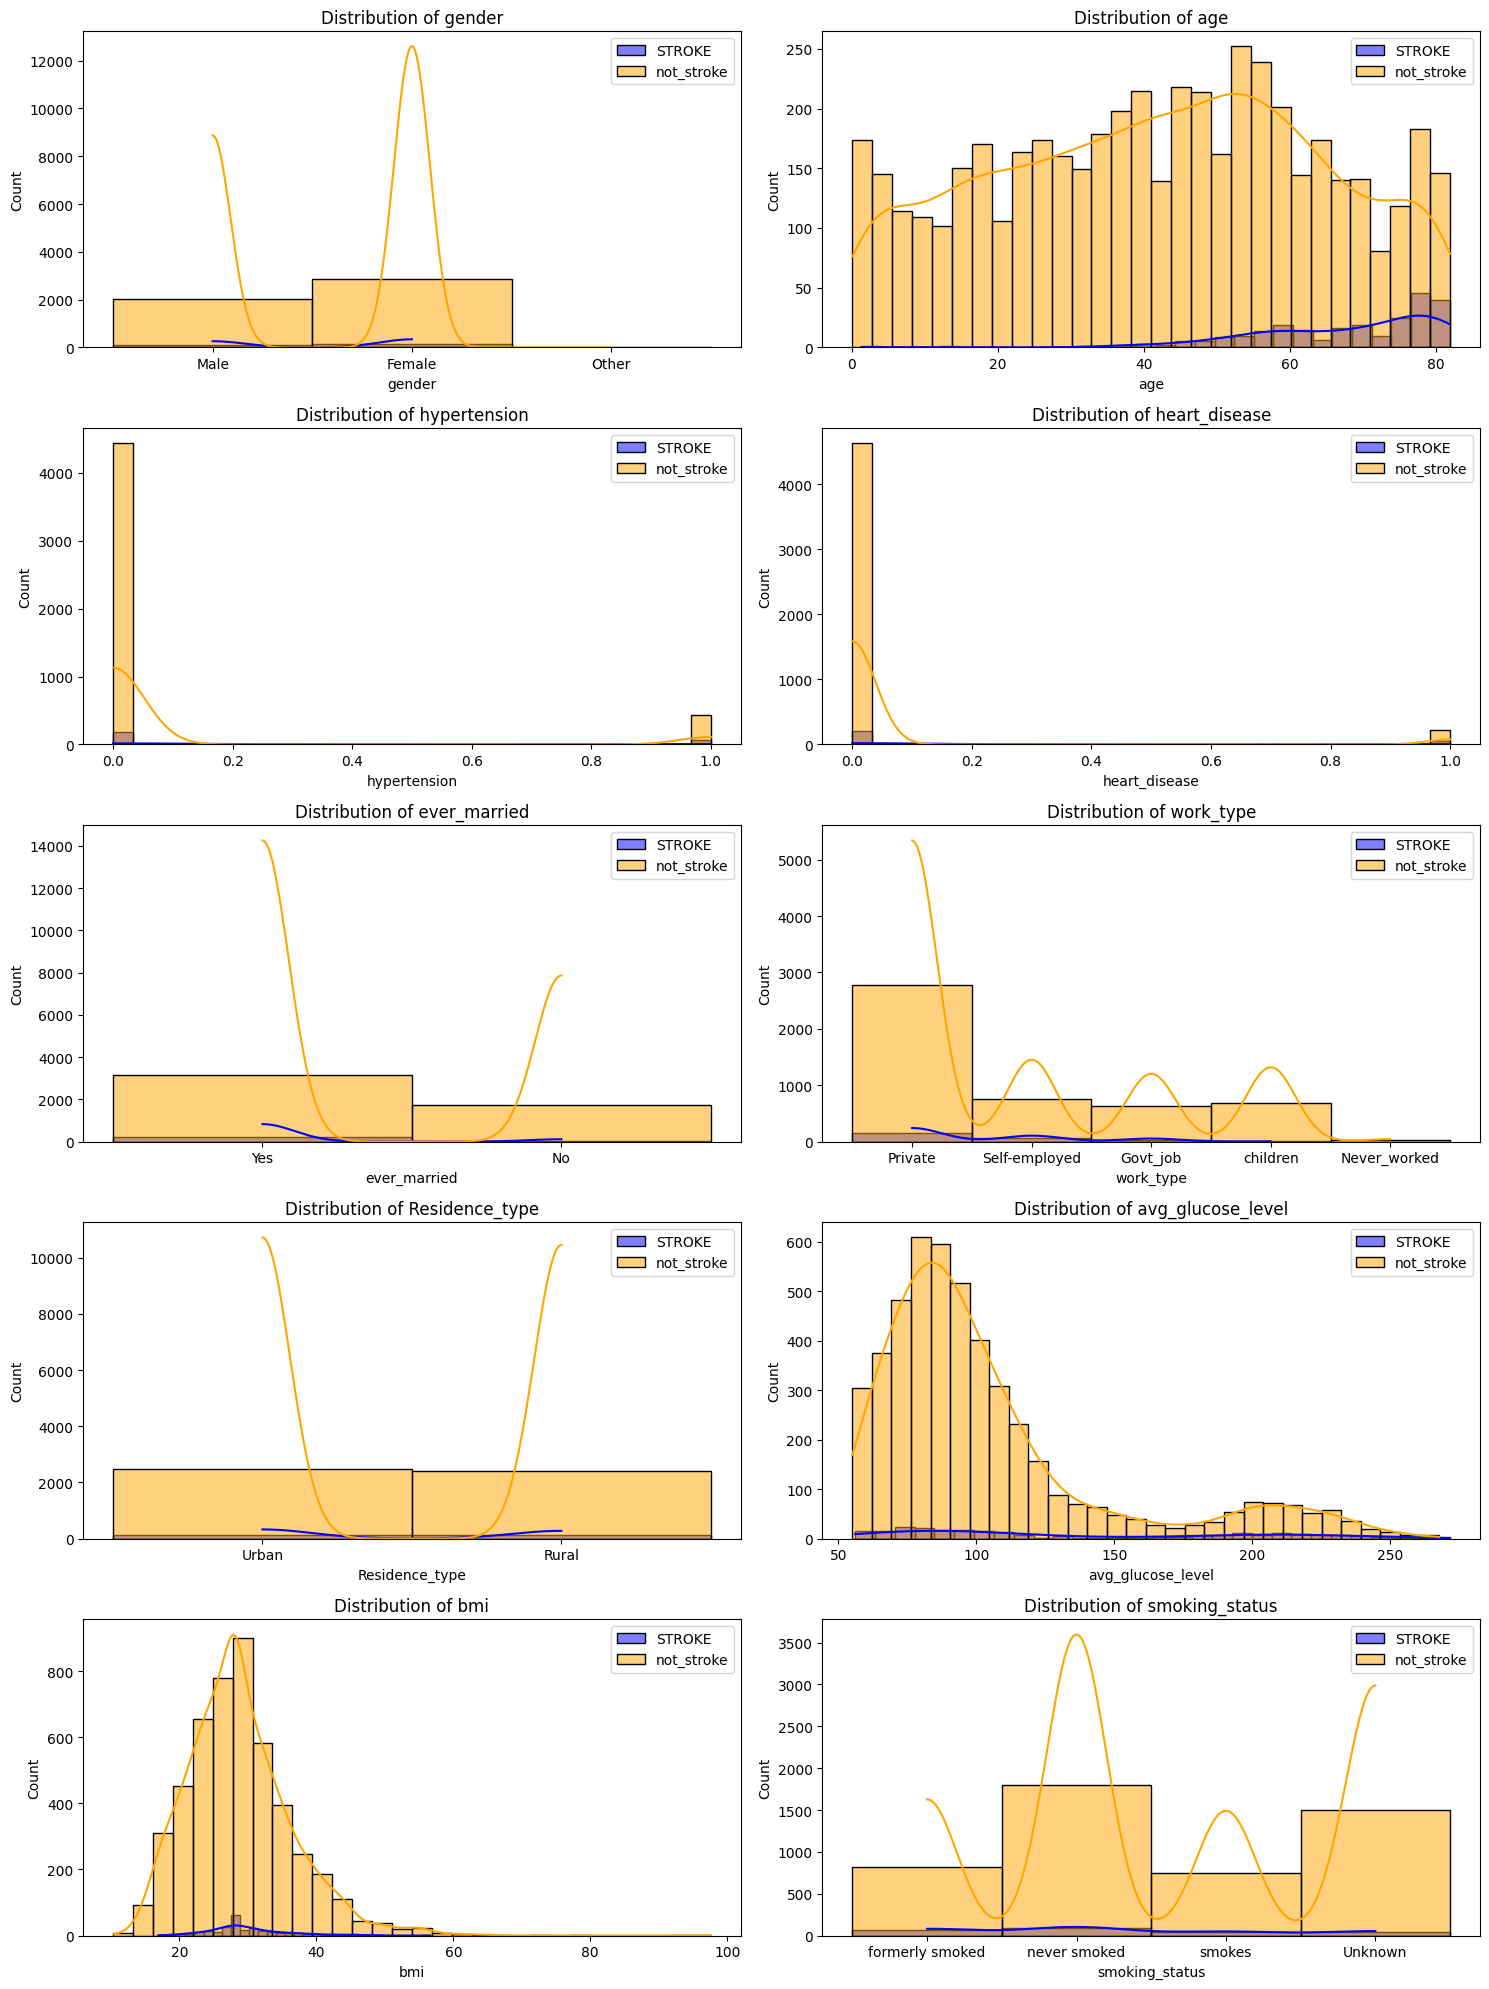

In [20]:
# Separate the data into Wilson's disease patients and others
stroke_df = df[df['stroke'] == 1]
not_stroke = df[df['stroke'] == 0]

# List of general features
general_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']


# Plot histograms for each feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(general_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(stroke_df[feature], color="blue", kde=True, label="STROKE", bins=30)
    sns.histplot(not_stroke[feature], color="orange", kde=True, label="not_stroke", bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

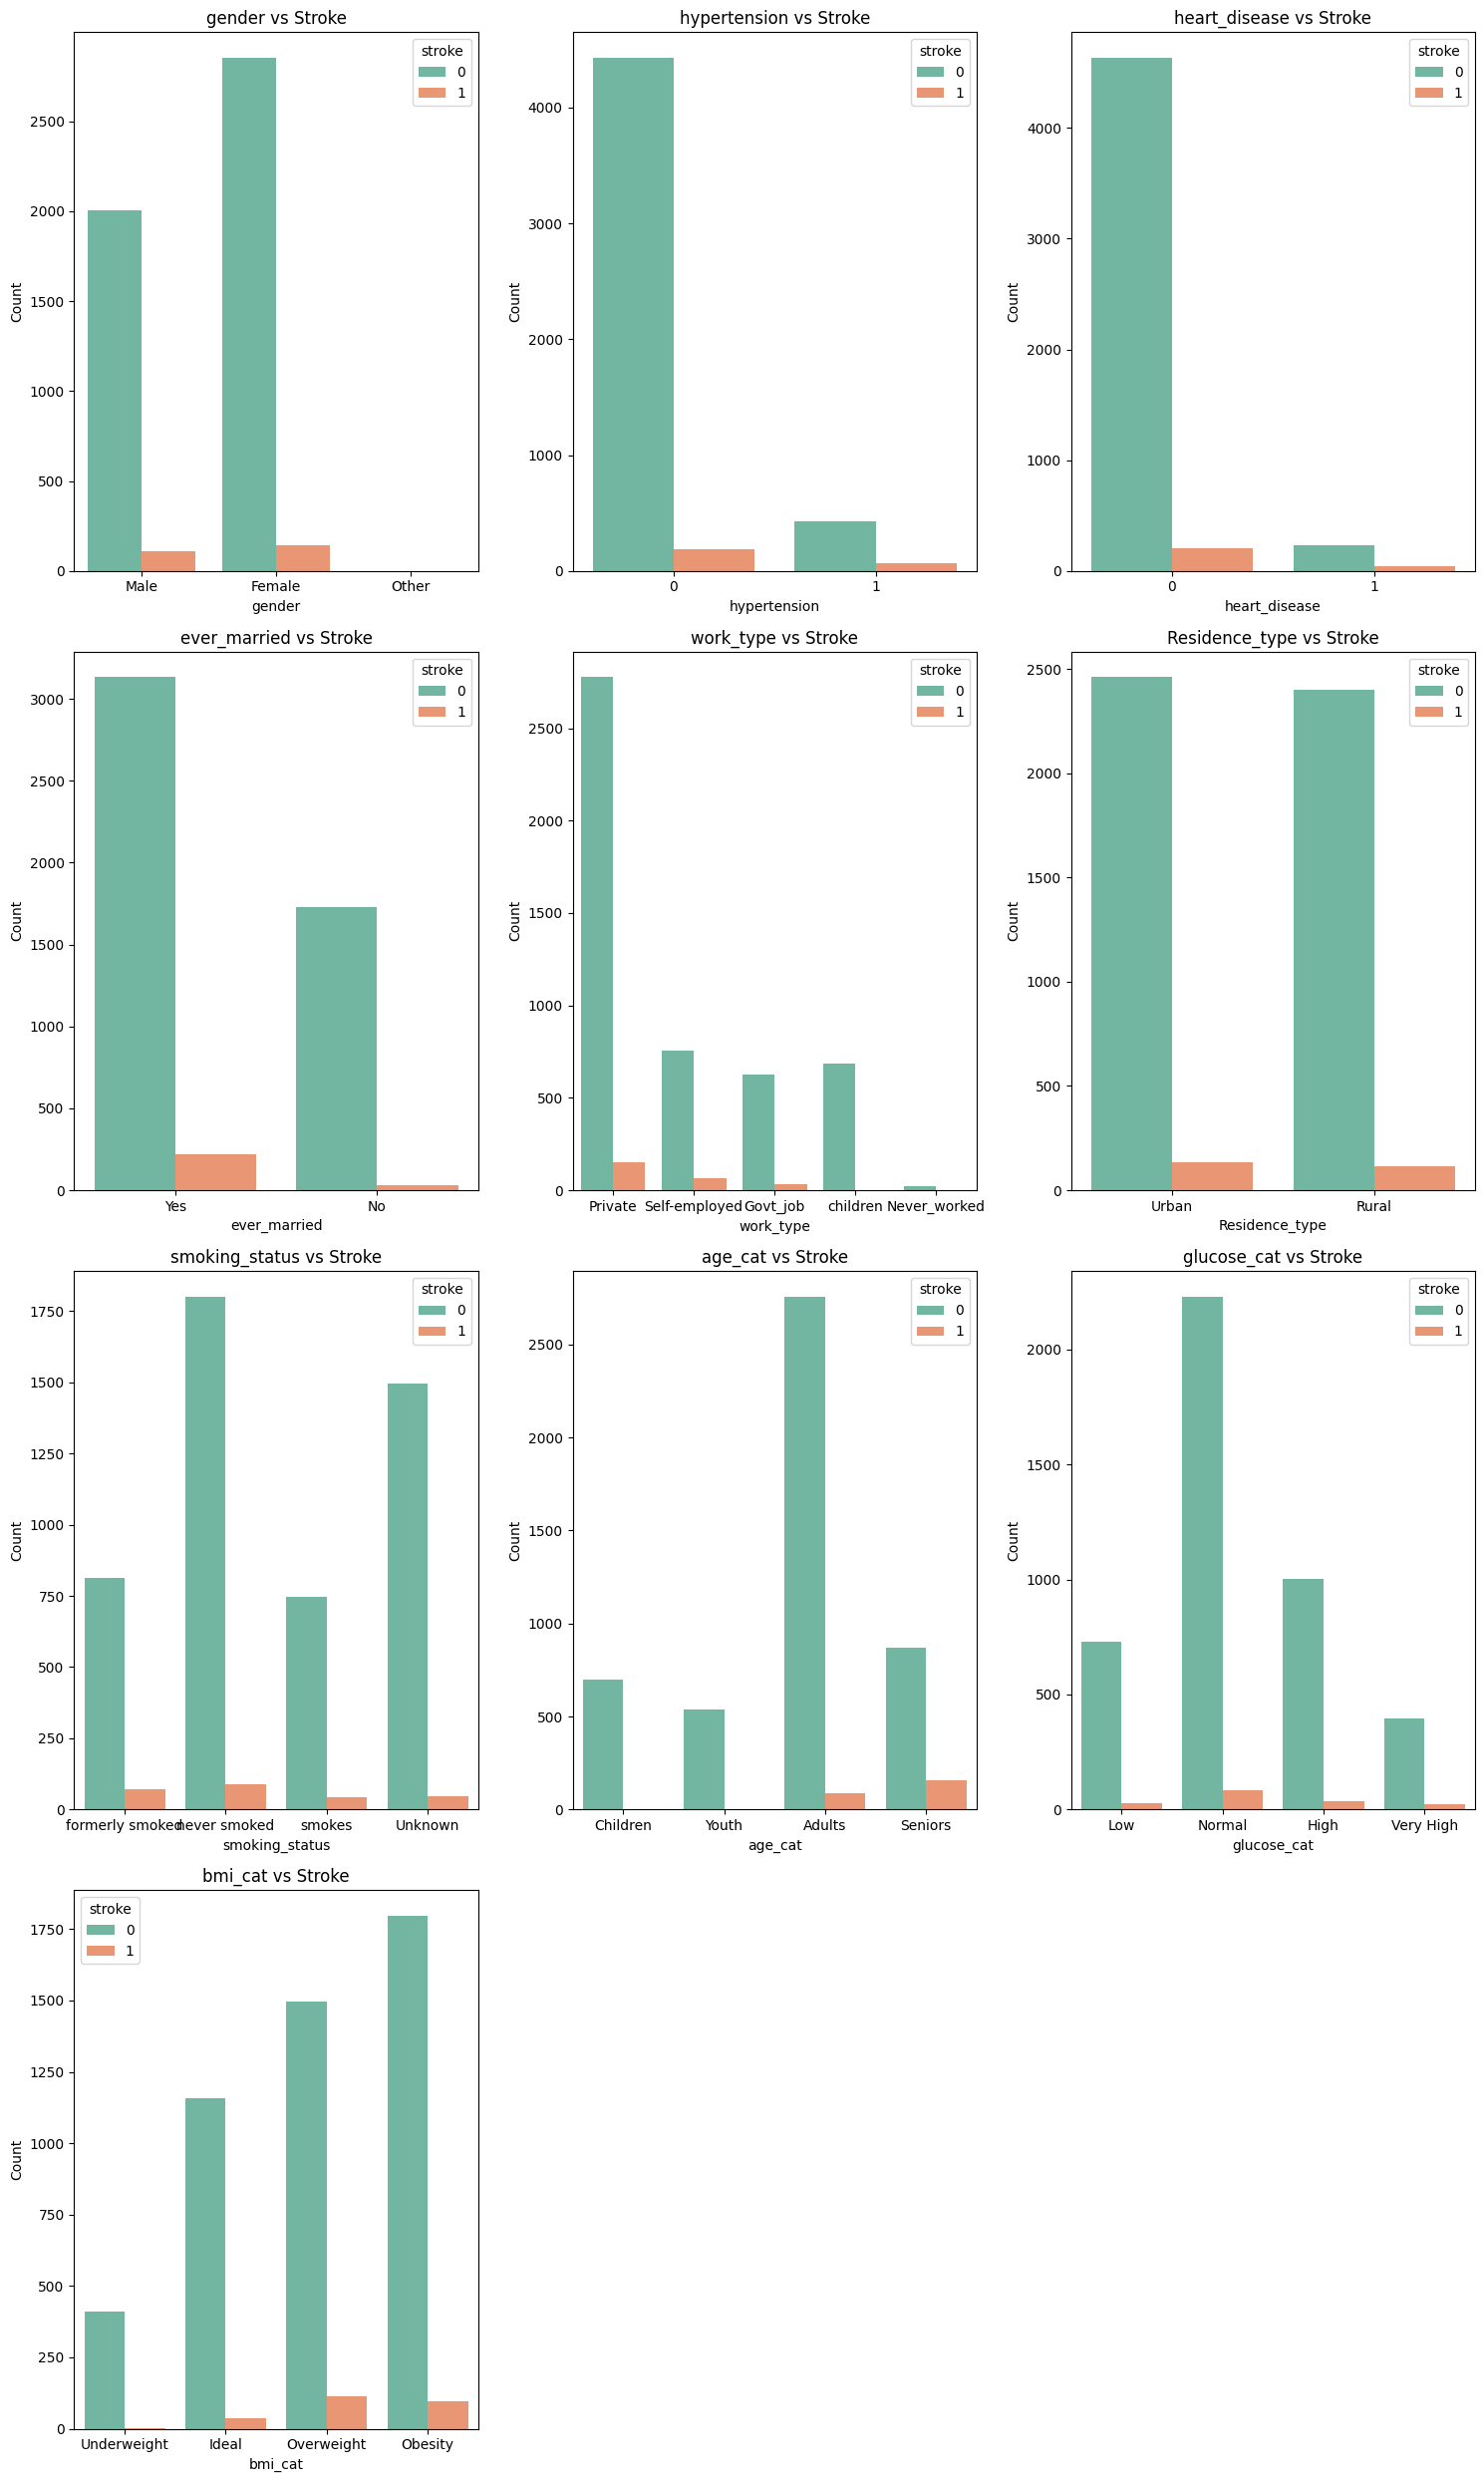

In [21]:
# Distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status', 'age_cat', 'glucose_cat', 'bmi_cat']

plt.figure(figsize=(15, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=feature, hue='stroke', palette='Set2')
    plt.title(f'{feature} vs Stroke')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [22]:
# Подсчитываем количество каждого значения в столбце 'stroke'
distribution = df['stroke'].value_counts(normalize=True) * 100

distribution


,proportion
stroke,
0,95.127202
1,4.872798


Text(0.5, 1.0, 'Correlation Heatmap')

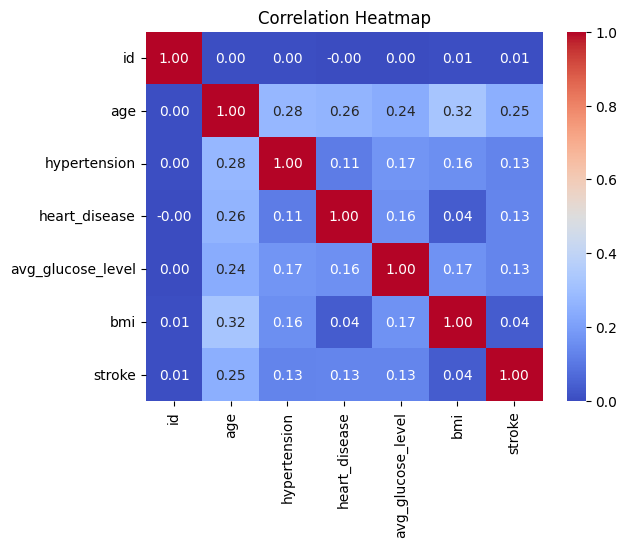

In [23]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')



**Here we see the the most correlation between AGE and STROKE. Let check that on other vizualization tools.**

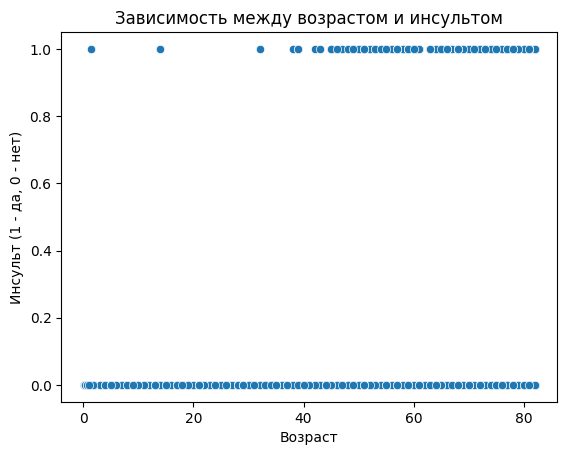

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='stroke', data=df)
plt.title('Зависимость между возрастом и инсультом')
plt.xlabel('Возраст')
plt.ylabel('Инсульт (1 - да, 0 - нет)')
plt.show()


#**Тестирование статистической значимости (t-тест):**
Если хотите провести статистическое тестирование, чтобы проверить, существует ли статистически значимая разница между возрастом людей с инсультом и без инсульта, можно использовать t-тест:

Если p-value меньше 0.05, это указывает на то, что существует статистически значимая разница в возрасте между людьми с инсультом и без инсульта.



### **Statistical Significance Testing (t-test):**
If you want to conduct statistical testing to check if there is a statistically significant difference in age between people with a stroke and those without, you can use a t-test.

If the p-value is less than 0.05, it indicates that there is a statistically significant difference in age between people with a stroke and those without.

In [25]:
from scipy import stats

# Разделяем данные на две группы: с инсультом и без
stroke_group = df[df['stroke'] == 1]['age']
no_stroke_group = df[df['stroke'] == 0]['age']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(stroke_group, no_stroke_group)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')


T-Statistic: 18.08083426887953
P-Value: 7.0307775129939774e-71


The results of t-test are:

- **T-Statistic: 18.08**  
- **P-Value: 7.03e-71** (which is a very small value)
In scientific notation, 7.03e-71 means
7.03
×
1
0
−
71
7.03×10
−71
 , which is 0.000...000703, with 71 zeros after the decimal point.


### Interpretation:

- The **t-statistic** value of 18.08 indicates a large difference between the two groups (with stroke vs without stroke) in terms of their age distributions.
- The **p-value** is extremely small (7.03e-71), which is much smaller than the typical significance threshold of 0.05. This suggests that there is a **statistically significant difference** in age between people with a stroke and those without a stroke.

In conclusion, the age distributions of the two groups are significantly different from each other.

#**VIZUALIZATION OF CATEGORICAL VARIABLES**




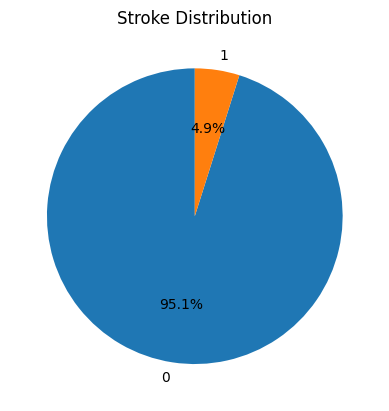

In [26]:
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Stroke Distribution')
plt.ylabel('')
plt.show()


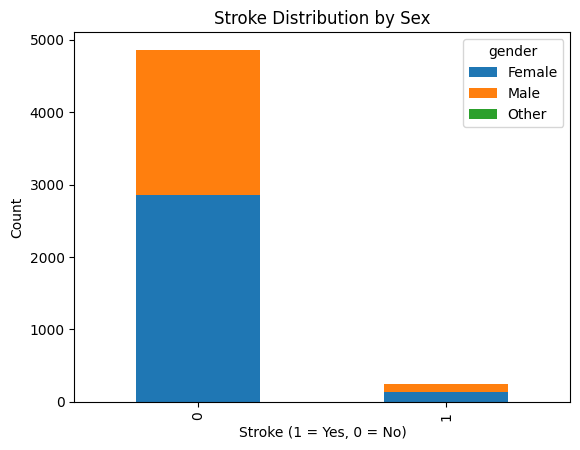

In [27]:
pd.crosstab(df['stroke'], df['gender']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Sex')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [28]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat', 'age_cat', 'glucose_cat'],
      dtype='object')

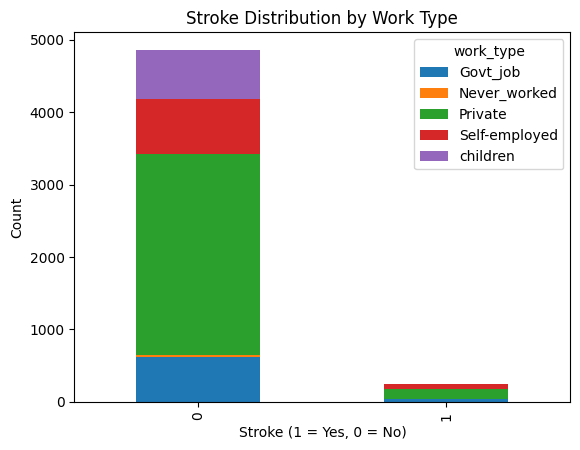

In [29]:
pd.crosstab(df['stroke'], df['work_type']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

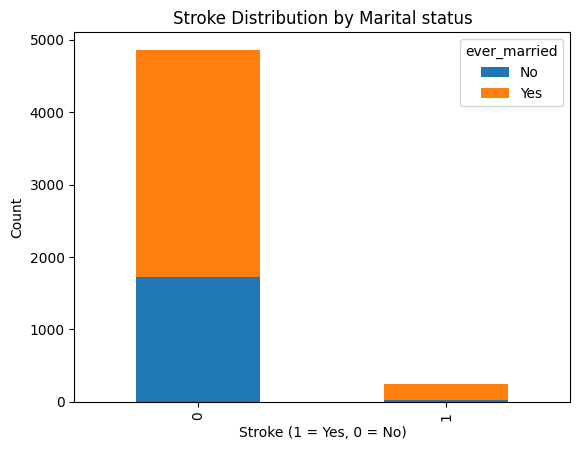

In [30]:
pd.crosstab(df['stroke'], df['ever_married']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Marital status')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

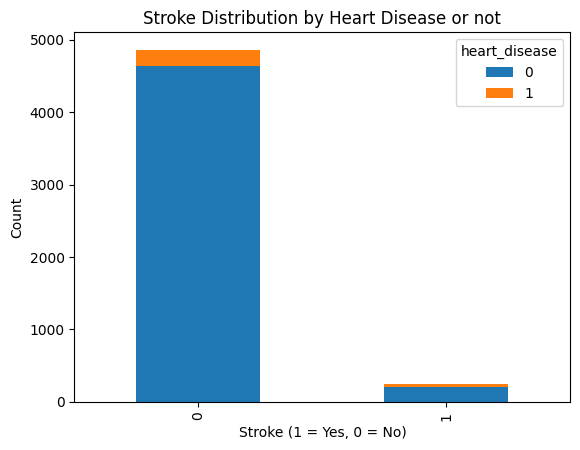

In [31]:
pd.crosstab(df['stroke'], df['heart_disease']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Heart Disease or not')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

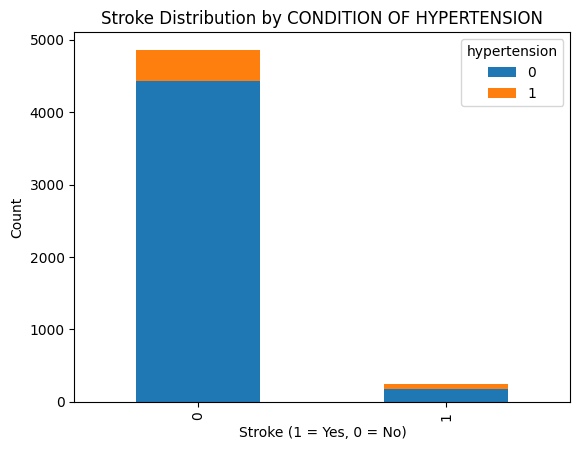

In [32]:
pd.crosstab(df['stroke'], df['hypertension']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by CONDITION OF HYPERTENSION')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

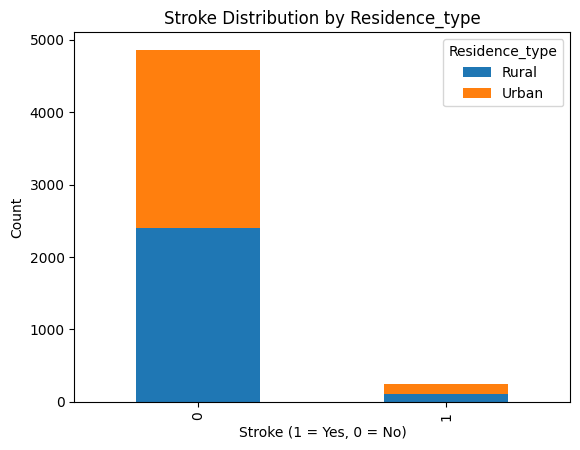

In [33]:
pd.crosstab(df['stroke'], df['Residence_type']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Residence_type')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

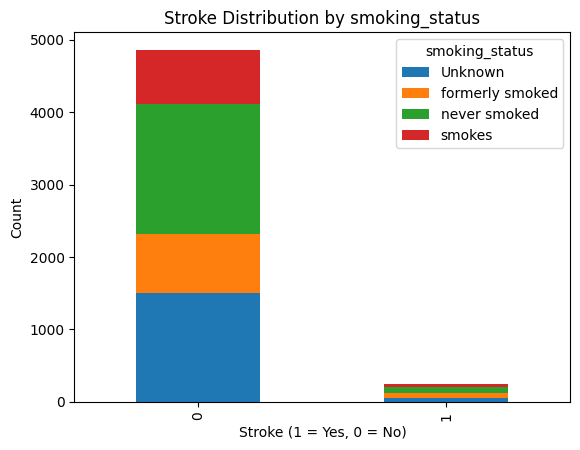

In [34]:
pd.crosstab(df['stroke'], df['smoking_status']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by smoking_status')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

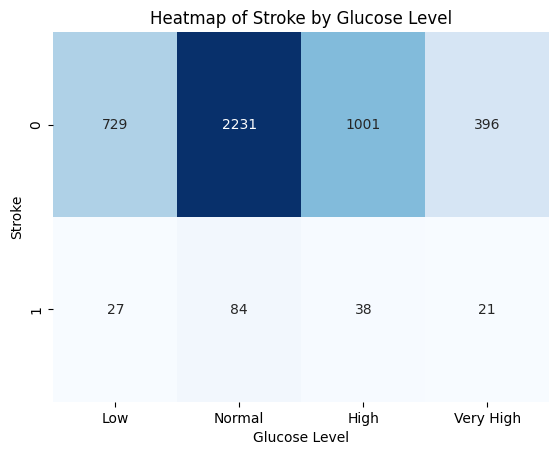

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab
crosstab = pd.crosstab(df['stroke'], df['glucose_cat'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Stroke by Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Stroke')
plt.show()


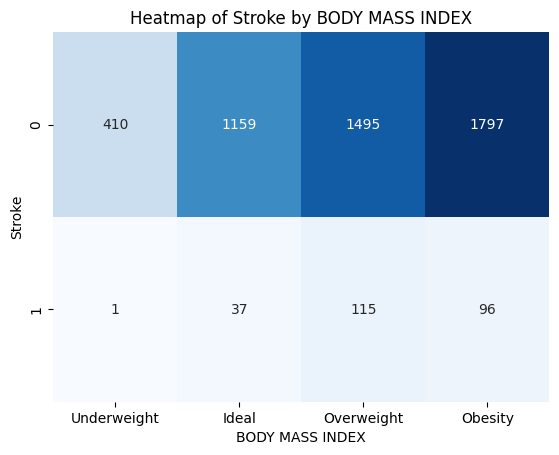

In [36]:
# Create a crosstab
crosstab = pd.crosstab(df['stroke'], df['bmi_cat'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Stroke by BODY MASS INDEX')
plt.xlabel('BODY MASS INDEX')
plt.ylabel('Stroke')
plt.show()

#**ONE HOT ENCODING FOR THE CATEGORICAL VARIABLES**

**Use one-hot encoding for categorical variables with more than two unique values (e.g., work_type, smoking_status):**





In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'Residence_type'], drop_first=True)



**b. Label Encoding for Binary Variables**




In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])  # 'Male' -> 1, 'Female' -> 0 (example)
df['ever_married'] = encoder.fit_transform(df['ever_married'])  # 'Yes' -> 1, 'No' -> 0


**c. Encoding category Variables
If bmi_cat, age_cat, and glucose_cat are already labeled with meaningful numerical values (e.g., categories like low, medium, high), convert them to integers:**




In [40]:
df['bmi_cat'] = df['bmi_cat'].cat.codes
df['age_cat'] = df['age_cat'].cat.codes
df['glucose_cat'] = df['glucose_cat'].cat.codes


In [41]:
df.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [42]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'Residence_type'], drop_first=True)


In [43]:
df.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
avg_glucose_level,float64
bmi,float64
stroke,int64
bmi_cat,int8


#**MODELLING**

#1. Splitting Data into Training and Testing Sets



In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Define X and y
X = df.drop(columns=['stroke'], axis=1)  # Replace with your actual target column name
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

# SMOTE for oversampling
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

# Confirm shapes
print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))


Shape of Training features: (7284, 19)
Shape of Training targets: (7284,)
Shape of Testing features: (1278, 19)
Shape of Testing targets: (1278,)


#**LOGISTIC REGRESSION**

 #**Train the Model**

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resample = scaler.fit_transform(X_resample)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_resample, y_resample)

LogisticRegression(class_weight='balanced')

#test the model

**Confusion Matrix: Provides counts of true positives, true negatives, false positives, and false negatives.**

**Classification Report:**

Precision: How well the model avoids false positives.

Recall: How well the model detects true positives.

F1-Score: Harmonic mean of precision and recall.

Accuracy: Overall correctness of the model.**


In [70]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))




Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1219
           1       0.10      0.29      0.15        59

    accuracy                           0.85      1278
   macro avg       0.53      0.58      0.54      1278
weighted avg       0.92      0.85      0.88      1278

Confusion Matrix:
 [[1074  145]
 [  42   17]]
ROC-AUC Score: 0.7237524506055255


In [74]:
import pandas as pd
import numpy as np

# Get coefficients from the logistic regression model
coefficients = model.coef_[0]  # model.coef_ is a 2D array (n_classes x n_features)

# Pair coefficients with feature names
feature_names = X.columns  # Ensure your dataframe has column names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add an absolute value column for ranking
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])

# Sort by absolute importance
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df)


                           Feature  Coefficient  Abs_Coefficient
2                              age     3.737408         3.737408
9                          age_cat    -1.765349         1.765349
12               work_type_Private     1.263785         1.263785
15  smoking_status_formerly smoked     1.109710         1.109710
13         work_type_Self-employed     1.033722         1.033722
17           smoking_status_smokes     0.979442         0.979442
16     smoking_status_never smoked     0.947270         0.947270
14              work_type_children     0.853166         0.853166
8                          bmi_cat    -0.797042         0.797042
5                     ever_married    -0.491784         0.491784
7                              bmi     0.412917         0.412917
18            Residence_type_Urban     0.402753         0.402753
1                           gender    -0.344758         0.344758
10                     glucose_cat    -0.274435         0.274435
3                     hyp

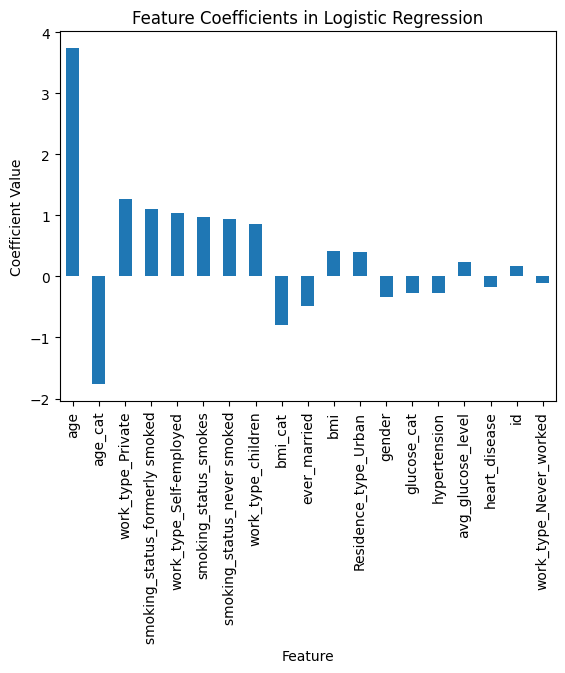

In [75]:
import matplotlib.pyplot as plt

# Plot feature coefficients
importance_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title('Feature Coefficients in Logistic Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.show()


**The model struggles to detect strokes (Class 1) due to:**

**Class Imbalance:** Despite SMOTE, the model is biased toward the majority class (No Stroke).

**Features: Some features may not have strong predictive power for identifying strokes.**

**Model Type: Logistic regression is a linear model and may not capture complex relationships.**


#**Random Forest Classifier:**



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


In [50]:
# Apply Random Oversampling to balance the training data
oversampler = RandomOverSampler(random_state=2021)
X_resample, y_resample = oversampler.fit_resample(X_train, y_train)


In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2021)

In [52]:
# Train the RandomForest model on the resampled data
model = RandomForestClassifier(class_weight='balanced', random_state=2021)
model.fit(X_resample, y_resample)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


#Evaluate the Model

In [53]:
confusion_matrix(y_test, y_pred)

array([[1210,    9],
       [  58,    1]])

High True Negatives (1191):
The model performs well at identifying non-stroke cases (majority class).
Poor True Positives (4):
The model struggles significantly with detecting actual stroke cases.
High False Negatives (55):
Missing these cases is critical since strokes are a serious medical condition.
False Positives (28):
While these are fewer, they might not be as critical as missing a stroke case.


**Classification Report**

In [54]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      1219\n           1       0.10      0.02      0.03        59\n\n    accuracy                           0.95      1278\n   macro avg       0.53      0.50      0.50      1278\nweighted avg       0.91      0.95      0.93      1278\n'

**ROC-AUC Score**

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')


ROC-AUC Score: 0.77


#**GRADIENT BOOSTING**

In [57]:
pip install xgboost


In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)



In [59]:
# Step 2: Apply SMOTE to oversample the training data
smote = SMOTE(random_state=2021)
X_resample, y_resample = smote.fit_resample(X_train, y_train)



In [60]:
# Step 3: Calculate scale_pos_weight
neg_class = sum(y_resample == 0)
pos_class = sum(y_resample == 1)
scale_pos_weight = neg_class / pos_class



In [61]:
# Step 4: Train the XGBoost model
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=2021, use_label_encoder=False, eval_metric='logloss')
model.fit(X_resample, y_resample)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=2021, ...)

In [62]:
# Step 5: Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluate the model
classification_report(y_test, y_pred)
roc_auc_score(y_test, y_pred_proba)


0.7499061470224275

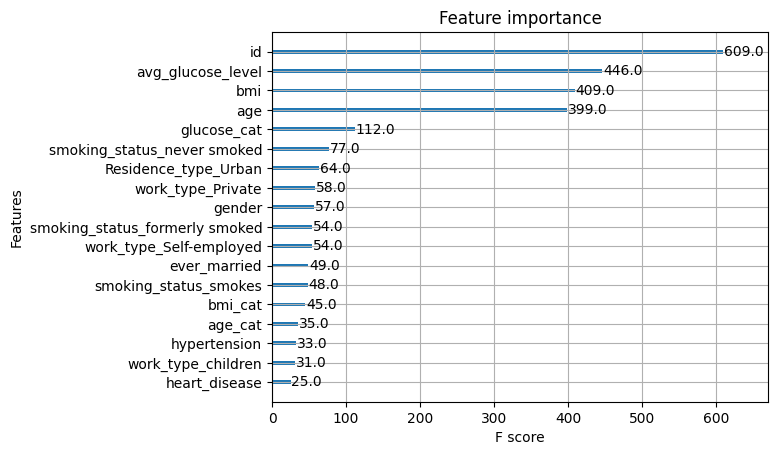

In [63]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

#F-Score in XGBoost Feature Importance
In XGBoost, the F-score for a feature refers to the frequency or count of how many times the feature was used to split the data across all the trees in the model.

Splitting Frequency:

Every time a feature is chosen to split the data (i.e., to create a branch in a tree), its F-score is incremented.
Features with higher F-scores are considered more important because they contribute more frequently to the decision-making process.
Visualization in plot_importance:

**The plot shows features ranked by their F-scores (importance scores).**
**The higher the bar for a feature, the more important it is in the model.**

#Optional: Fine-Tune the Model
**You can improve performance by tuning hyperparameters like:**

n_estimators:
Number of boosting rounds.

learning_rate:
Controls the contribution of each tree.
max_depth: Depth of each tree.
subsample: Fraction of samples used for training each tree.


#Example of Hyperparameter Tuning with GridSearchCV:



In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.02, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=2021, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

grid_search.fit(X_resample, y_resample)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1219
           1       0.18      0.12      0.14        59

    accuracy                           0.93      1278
   macro avg       0.57      0.55      0.55      1278
weighted avg       0.92      0.93      0.93      1278

ROC-AUC Score: 0.7584989085246313


#**Cross-Validation**

In [77]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_resample, y_resample, cv=5, scoring='roc_auc')
print("Cross-validation scores: ", cv_scores)


Cross-validation scores:  [0.92216494 0.97055654 0.97540662 0.97158346 0.97363694]


#**MODEL DEPLOYMENT**

In [78]:
import joblib
joblib.dump(model, 'stroke_detection_model.pkl')


['stroke_detection_model.pkl']

#**Step 2: Create a Flask API**



In [79]:
pip install flask joblib pandas scikit-learn


#**Create a Flask app:**



#**Step 1: Create app.py**

In [84]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the scaler on your data

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and scaler
model = joblib.load('stroke_detection_model.pkl')  # Ensure 'stroke_detection_model.pkl' is in the same directory as your app.py
scaler = joblib.load('scaler.pkl')  # Ensure 'scaler.pkl' is in the same directory as your app.py

# Define prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the POST request
    data = request.get_json()

    # Convert the input data into a pandas DataFrame
    input_data = pd.DataFrame(data)

    # Preprocess the data if necessary (e.g., scaling)
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    prediction_prob = model.predict_proba(input_data_scaled)[:, 1]  # Probability for stroke class

    # Return prediction result
    return jsonify({
        'prediction': int(prediction[0]),  # 0 or 1 (no stroke or stroke)
        'probability': float(prediction_prob[0])  # Probability for stroke class
    })

# Run the Flask app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=80, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:80
 * Running on http://172.28.0.12:80
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [80]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
model = joblib.load('stroke_detection_model.pkl')

# Define prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the POST request
    data = request.get_json()

    # Convert the input data into a pandas DataFrame
    input_data = pd.DataFrame(data)

    # Preprocess the data if necessary (e.g., scaling, encoding)
    # Assuming you used StandardScaler during training:
    # If scaling was applied, use the scaler object you used before
    scaler = joblib.load('scaler.pkl')  # Save and load the scaler as well if needed
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    prediction_prob = model.predict_proba(input_data_scaled)[:, 1]  # Get probability for stroke class

    # Return prediction result
    return jsonify({
        'prediction': int(prediction[0]),  # 0 or 1 (no stroke or stroke)
        'probability': float(prediction_prob[0])  # Probability for stroke class
    })

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


#**Step 3: Testing the API**


In [82]:
python app.py


SyntaxError: invalid syntax (<ipython-input-82-b851947b46d7>, line 1)

This will start a local server at http://127.0.0.1:5000/.

test the API by sending a POST request to the /predict endpoint. Here's how to do it with Postman or using Python’s requests library.

Using Postman:

Set the method to POST.
Use the URL: http://127.0.0.1:5000/predict.
In the Body tab, set the request type to JSON and provide the input data (e.g., a JSON object of feature values).

#**WE ALSO CAN USE PYTHON**

In [ ]:
import requests

# Example input data for a prediction
input_data = {
    "age": [45],
    "gender": ["Male"],
    "hypertension": [0],
    "heart_disease": [0],
    "bmi": [28.5],
    "avg_glucose_level": [90],
    "smoking_status": ["never smoked"]
    # Add other features similarly
}

# Send POST request
response = requests.post("http://127.0.0.1:5000/predict", json=input_data)

# Print the result
print(response.json())


#**Step 4: Deploy the API Online**

Once I’ve tested it locally, I can deploy Flask API to a platform like AWS.


